(2000, 1500, 3)


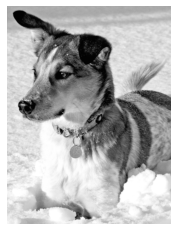

In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os
from skimage import color


A = imread(os.path.join('..','python','DATA', 'dog.jpg'))
print(A.shape)
imgGray = color.rgb2gray(A)
img = plt.imshow(imgGray)
img.set_cmap('gray')
plt.axis('off')
plt.show()



In [31]:
U, S, VT = np.linalg.svd(imgGray, full_matrices=False)
S = np.diag(S)
lst_x=[]
lst=[]
rval = []
for r in range(5, 100, 5):
    lst_x.append(r)
    # economy SVD
    Xapprox = U[:,:r] @ S[0:r,:r] @ VT[:r,:]
    
    # rel-reconstruction error
    rel_err = np.linalg.norm(Xapprox - imgGray, 'fro')/np.linalg.norm(imgGray, 'fro')
    rel_err = (rel_err)**2
    lst.append(rel_err)
    updatedlist = [1 - x for x in lst]
    print(f"error for rank {r}: ","{:.2e}".format(rel_err))
    rval.append(r)
    

error for rank 5:  2.57e-02
error for rank 10:  1.48e-02
error for rank 15:  1.02e-02
error for rank 20:  7.66e-03
error for rank 25:  6.03e-03
error for rank 30:  4.95e-03
error for rank 35:  4.22e-03
error for rank 40:  3.65e-03
error for rank 45:  3.22e-03
error for rank 50:  2.88e-03
error for rank 55:  2.60e-03
error for rank 60:  2.37e-03
error for rank 65:  2.18e-03
error for rank 70:  2.01e-03
error for rank 75:  1.86e-03
error for rank 80:  1.73e-03
error for rank 85:  1.62e-03
error for rank 90:  1.52e-03
error for rank 95:  1.42e-03


[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]
[0.9743413571313144, 0.9852009685527753, 0.9898274779366308, 0.9923438434158677, 0.9939692935916629, 0.9950497818739178, 0.9957821501802169, 0.9963456932930614, 0.9967773290071643, 0.9971223540653577, 0.9973957796119878, 0.9976282972932392, 0.9978242821276755, 0.997994230764529, 0.9981410111908674, 0.9982697715612111, 0.9983829506014045, 0.9984844791943405, 0.9985767517469936]


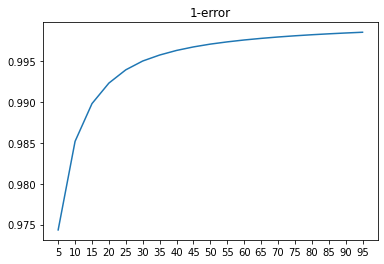

In [32]:
xi = list(range(len(lst_x)))
print(lst_x)
print(updatedlist)

plt.figure(1)
plt.plot(lst_x,updatedlist)
plt.xticks(lst_x)
plt.title('1-error')
plt.show()

In [33]:
mylist = next(k for k, value in enumerate(updatedlist)
             if value > 0.99)
print(" index is: ", rval[mylist])

 index is:  20


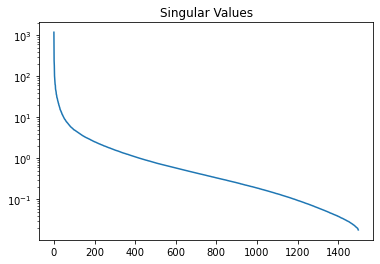

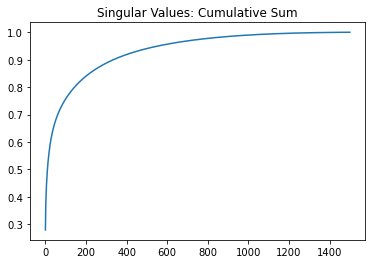

In [27]:
plt.figure(2)
plt.semilogy(np.diag(S))
plt.title('Singular Values')
plt.show()

plt.figure(3)
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))
plt.title('Singular Values: Cumulative Sum')
plt.show()